# Trabajo Fin de Máster
# Documento *(código) 1 de 2
Propuesta 117. Proyectos tecnológicos mediante metodología ágil. Gestión de riesgos y complejidad. Caso República Dominicana.

Descripción de la propuesta: Algunos proyectos tecnológicos como los de investigación multidisciplinar, sistemas de información o inteligencia artificial requieren la aplicación de una metodología ágil para su gestión. Sin embargo, uno de los mayores problemas es la realización de la gestión de riesgos y su relación con la complejidad. Se deben estudiar alternativas para evitar el posible fracaso del proyecto. Una de las alternativas es la utilización de la evolución probabilística de riesgos mediante inferencia bayesiana.

**Autor:** Leandro Leonardo

**Fecha de elaboración:** 01/01/2025

**Programa:** Lógica, Computación e IA

---

# CONTRUYENDO RED BAYESIANA SIN APRENDIZAJE SUPERVISADO
El modelo aprendera de sus inferencias



---



In [1]:
!python --version
# Debería mostrar: Python 3.10.11
!pip --version

print("Bloque ejecutado correctamente, puede continuar.")

Python 3.10.11
pip 25.0.1 from C:\Users\User\Desktop\TFM_Leandro_Leonardo_Dominican_Republic\.venv\lib\site-packages\pip (python 3.10)

Bloque ejecutado correctamente, puede continuar.


In [2]:
# ================================================
# PASO 1: DESCRIPCIÓN DE LIBRERÍAS UTILIZADAS
# ================================================

# pandas        → Manejo de datos tabulares (dataset sintético, DataFrame)
# numpy         → Operaciones numéricas y generación de ruido aleatorio
# pgmpy         → Construcción, entrenamiento e inferencia en redes bayesianas
# networkx      → Visualización de grafos dirigidos (estructura de la red)
# matplotlib    → Gráficos (visualización de red y métricas)
# ipywidgets    → Creación de widgets interactivos para inferencia
# scikit-learn  → Codificación de variables y métricas de evaluación (confusión, f1, etc.)

!pip install pandas==1.5.3 numpy==1.23.5 pgmpy==0.1.23 networkx==2.8.8 matplotlib==3.7.1 ipywidgets==8.1.1 scikit-learn==1.2.2 seaborn==0.13.2 --quiet

print('\n\n\n Finalizado, puedes continuar al siguiente bloque de código.')




 Finalizado, puedes continuar al siguiente bloque de código.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# =========================================
# BLOQUE 0: Comprobación de recursos y timer
# =========================================

import sys
import platform
import os
import time
import psutil
import shutil
import multiprocessing

try:
    import torch
    has_torch = True
except ImportError:
    has_torch = False

# — Parámetros mínimos recomendados —
MIN_PYTHON    = (3, 10)    # Versión mínima de Python
MIN_MEM_GB    = 17         # RAM libre mínima en GB
MIN_DISK_GB   = 20        # Espacio libre en disco mínimo en GB

print("=== RECURSOS DEL ENTORNO ===")
# Python
pv = platform.python_version_tuple()
print(f"- Python {platform.python_version()} ", end="")
if tuple(map(int, pv[:2])) < MIN_PYTHON:
    print(f"(¡Se recomienda >= {MIN_PYTHON}!)")
else:
    print("✓")

# CPU
cores = multiprocessing.cpu_count()
print(f"- Núcleos de CPU disponibles: {cores}")

# RAM
vm = psutil.virtual_memory()
free_mem = vm.available / 1024**3
print(f"- RAM libre: {free_mem:.1f} GB", end="")
if free_mem < MIN_MEM_GB:
    print(f"  (¡Se recomienda ≥ {MIN_MEM_GB} GB!)")
else:
    print(" ✓")

# Disco
du = shutil.disk_usage(os.getcwd())
free_disk = du.free / 1024**3
print(f"- Espacio libre en disco: {free_disk:.1f} GB", end="")
if free_disk < MIN_DISK_GB:
    print(f"  (¡Se recomienda ≥ {MIN_DISK_GB} GB!)")
else:
    print(" ✓")

# GPU (opcional)
if has_torch and torch.cuda.is_available():
    name = torch.cuda.get_device_name(0)
    total = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"- GPU disponible: {name} ({total:.1f} GB)")
else:
    print("- GPU no detectada o no hay torch instalado")

# Inicia el cronómetro
_start_time = time.time()

print("=============================\n")


=== RECURSOS DEL ENTORNO ===
- Python 3.10.11 ✓
- Núcleos de CPU disponibles: 24
- RAM libre: 20.6 GB ✓
- Espacio libre en disco: 852.2 GB ✓
- GPU no detectada o no hay torch instalado



In [4]:
import numpy as np, pandas as pd, sklearn, seaborn as sns, matplotlib, pgmpy, networkx as nx

print("numpy   :", np.__version__)
print("pandas  :", pd.__version__)
print("sklearn :", sklearn.__version__)
print("seaborn :", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print("pgmpy   :", pgmpy.__version__)
print("networkx:", nx.__version__)

print("Bloque ejecutado correctamente, puede continuar.")
# Deben de aparecer las siguientes versiones:
# numpy   : 1.23.5
# pandas  : 1.5.3
# sklearn : 1.2.2
# seaborn : 0.13.2
# matplotlib: 3.7.1
# pgmpy   : 0.1.23
# networkx: 2.8.8
# Sin estas versiones, no aseguro una buena ejecucion de los pasos.

numpy   : 1.23.5
pandas  : 1.5.3
sklearn : 1.2.2
seaborn : 0.13.2
matplotlib: 3.7.1
pgmpy   : 0.1.23
networkx: 2.8.8
Bloque ejecutado correctamente, puede continuar.


In [5]:
# =========================================
# BLOQUE 0: configuración de logging, Suprimir INFO/WARNING
# =========================================

import logging

logging.getLogger("numpy").setLevel(logging.ERROR)
logging.getLogger("pandas").setLevel(logging.WARNING)
logging.getLogger("matplotlib").setLevel(logging.ERROR)
logging.getLogger("seaborn").setLevel(logging.ERROR)
logging.getLogger("ipywidgets").setLevel(logging.ERROR)
logging.getLogger("networkx").setLevel(logging.ERROR)
logging.getLogger("sklearn").setLevel(logging.ERROR)
logging.getLogger("random").setLevel(logging.ERROR)

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.


In [6]:
# =========================================
# PASO 1: Importación de librerías y configuración base
# =========================================

# Manipulación de datos
import pandas as pd  # Para crear y manejar estructuras tipo tabla (DataFrames)
import numpy as np    # Para cálculos numéricos, arreglos, y generación de números aleatorios
import random         # Para control de aleatoriedad con listas estándar

# Visualización
import matplotlib.pyplot as plt  # Para gráficos estándar
import networkx as nx            # Para crear y visualizar grafos (como la red bayesiana)
import ipywidgets as widgets     # Para interfaces interactivas en notebooks
from IPython.display import display  # Para mostrar elementos (widgets, tablas, gráficos)
import seaborn as sns

# Modelado bayesiano
from pgmpy.models import BayesianNetwork         # Clase principal para crear redes bayesianas
from pgmpy.estimators import BayesianEstimator   # Estimador para calcular las probabilidades condicionales
from pgmpy.inference import VariableElimination  # Método para hacer inferencias en la red

# Utilidades de machine learning
from sklearn.preprocessing import LabelEncoder  # Codificador para convertir texto en números
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Métricas de evaluación

# Configuración de semillas para reproducibilidad
# random.seed(42)     # Fija el generador aleatorio de Python para obtener los mismos resultados siempre
np.random.seed(42)  # Fija el generador aleatorio de NumPy para mantener la consistencia en experimentos

print('\n\n\n Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.')





 Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.




---



Distribución original de metodologías:
Metodologia Tradicional    10772
Lean                       10487
SAFe                       10287
XP                          9766
Kanban                      9523
Scrum                       9165
Name: Metodologia, dtype: int64


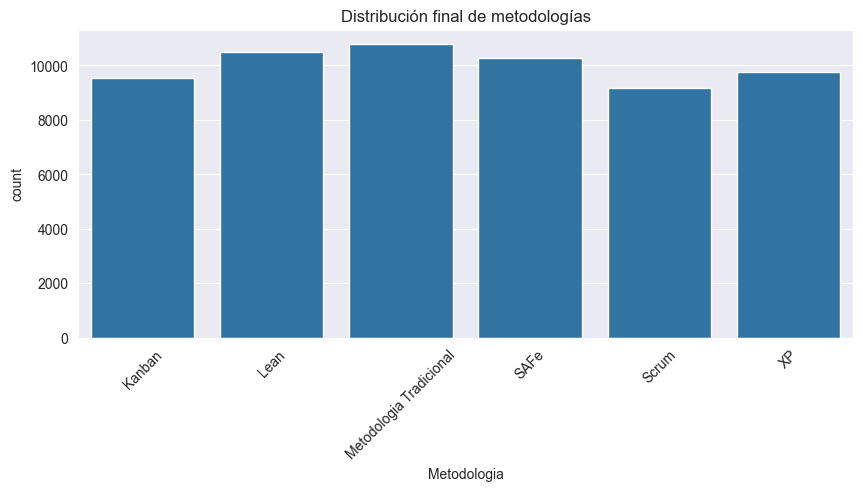




 Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.


In [7]:
# =========================================
# PASO 2: Generación, balanceo y exportación del dataset sintético
# =========================================

def generar_dataset_proyectos(n=60_000): #Nota> Más de 7 digitos consume toda la ram.
    """
    Genera un dataset sintético de 70,000 proyectos tecnológicos; balancea las metodologías
    para que cada una ocupe al menos el 5% de los registros y lo retorna como DataFrame.
    """

    # ── Definición de valores por cada variable ──────────────────────────────────────────────────────
    tipos_proyecto = [
        'Software Empresarial',    # Proyectos de sistemas de gestión interna
        'App Móvil',               # Aplicaciones para smartphones/tablets
        'Infraestructura Cloud',    # Despliegue y gestión en nube
        'Ciberseguridad',           # Soluciones de protección y defensa digital
        'IoT',                      # Internet de las Cosas
        'Realidad Virtual'          # Experiencias inmersivas VR/AR
    ]

    fases = [
        'Inicio',       # Definición de objetivos y alcance
        'Planificación',# Diseño de cronograma y asignación de tareas
        'Ejecución',    # Desarrollo y construcción de entregables
        'Monitoreo',    # Seguimiento de progreso y métricas
        'Cierre'        # Entrega final y lecciones aprendidas
    ]

    metodologias = [
        'Scrum', 'Kanban', 'XP', 'SAFe', 'Lean', 'Metodologia Tradicional' # Metodologías ágiles y enfoque tradicional
    ]

    # Variables a utilizar
    riesgo_niveles = ['Bajo', 'Medio', 'Alto']                   # Nivel de riesgo percibido
    complejidad_niveles = ['Baja', 'Media', 'Alta']              # Complejidad técnica del proyecto
    participacion_stakeholders = ['Poco', 'Moderado', 'Alto']     # Involucramiento de interesados
    duracion_niveles = ['Corta', 'Media', 'Larga']               # Duración estimada del proyecto
    tamano_equipo_niveles = ['Pequeño', 'Mediano', 'Grande']     # Tamaño del equipo de trabajo
    recursos_disponibles = ['Limitados', 'Suficientes', 'Abundantes']  # Disponibilidad de recursos
    frecuencia_cambios = ['Estables', 'Ocasionales', 'Frecuentes']     # Frecuencia de cambios de requisitos
    entorno_tecnologico = ['Maduro', 'Emergente', 'Experimental']      # Madurez de la tecnología usada
    alcance_niveles = ['Definido', 'Parcial', 'Ambiguo']               # Grado de definición del alcance
    disponibilidad_cliente = ['Escasa', 'Moderada', 'Constante']       # Atención/feedback del cliente
    experiencia_historial = ['Sin experiencia', 'Moderada', 'Alta']    # Experiencia en proyectos similares
    regulacion_niveles = ['Baja', 'Media', 'Alta']                     # Nivel de normativas aplicables

    # ── Columnas del DataFrame ────────────────────────────────────────────────────────────────────────
    columnas = [
        'Tipo_Proyecto',               # Tipo de proyecto (e.g., "Software Empresarial", "App Móvil", "Infraestructura Cloud", etc.)
        'Fase',                        # Etapa del proyecto ("Inicio", "Planificación", "Ejecución", "Monitoreo", "Cierre")
        'Riesgo',                      # Nivel de riesgo percibido ("Bajo", "Medio", "Alto")
        'Complejidad_Tecnica',         # Grado de complejidad técnica ("Baja", "Media", "Alta")
        'Participacion_Stakeholders',  # Involucramiento de interesados ("Poco", "Moderado", "Alto")
        'Duracion_Estimada',           # Duración estimada del proyecto ("Corta", "Media", "Larga")
        'Tamano_Equipo',               # Tamaño del equipo de trabajo ("Pequeño", "Mediano", "Grande")
        'Nivel_Incertidumbre',         # Incertidumbre en requisitos o entorno ("Bajo", "Medio", "Alto")
        'Recursos_Disponibles',        # Disponibilidad de recursos ("Limitados", "Suficientes", "Abundantes")
        'Frecuencia_Cambios',          # Frecuencia de cambios de requisitos ("Estables", "Ocasionales", "Frecuentes")
        'Entorno_Tecnologico',         # Madurez de la tecnología empleada ("Maduro", "Emergente", "Experimental")
        'Costo_Estimado',              # Nivel de costo relativo del proyecto ("Bajo", "Medio", "Alto")
        'Alcance_Proyecto',            # Claridad del alcance del proyecto ("Definido", "Parcial", "Ambiguo")
        'Autonomia_Equipo',            # Autonomía para tomar decisiones del equipo ("Baja", "Media", "Alta")
        'Dependencias_Externas',       # Dependencias con terceros ("Baja", "Media", "Alta")
        'Disponibilidad_Cliente',      # Colaboración y feedback del cliente ("Escasa", "Moderada", "Constante")
        'Experiencia_Historial',       # Experiencia en proyectos similares ("Sin experiencia", "Moderada", "Alta")
        'Normativas_Regulatorias'      # Grado de normativas aplicables ("Baja", "Media", "Alta")
    ]

    # Mapear cada columna a su lista de valores posibles
    varmap = {
        'Tipo_Proyecto': tipos_proyecto,
        'Fase': fases,
        'Riesgo': riesgo_niveles,
        'Complejidad_Tecnica': complejidad_niveles,
        'Participacion_Stakeholders': participacion_stakeholders,
        'Duracion_Estimada': duracion_niveles,
        'Tamano_Equipo': tamano_equipo_niveles,
        'Nivel_Incertidumbre': riesgo_niveles,
        'Recursos_Disponibles': recursos_disponibles,
        'Frecuencia_Cambios': frecuencia_cambios,
        'Entorno_Tecnologico': entorno_tecnologico,
        'Costo_Estimado': riesgo_niveles,
        'Alcance_Proyecto': alcance_niveles,
        'Autonomia_Equipo': complejidad_niveles,
        'Dependencias_Externas': complejidad_niveles,
        'Disponibilidad_Cliente': disponibilidad_cliente,
        'Experiencia_Historial': experiencia_historial,
        'Normativas_Regulatorias': regulacion_niveles
    }

    data = []
    for _ in range(n):
        #1) Muestra aleatoria de cada variable
        fila = [random.choice(varmap[col]) for col in columnas]
        fila_dict = dict(zip(columnas, fila))

        #2) Calcular score normalizado [0–1] según índice de cada valor
        scores = np.array([
            varmap[col].index(fila_dict[col]) / (len(varmap[col]) - 1)
            for col in columnas
        ])

        #3) Ponderar linealmente + ruido gaussiano para variabilidad
        pesos = np.linspace(1.0, 2.0, num=len(scores))
        ruido = np.random.normal(loc=1.0, scale=0.05, size=len(scores))
        ponderaciones = scores * pesos * ruido

        #4) Derivar probabilidades para las metodologías (primeros len(metodologias))
        probs = ponderaciones[:len(metodologias)]
        probs = probs / probs.sum() if probs.sum() != 0 else np.ones(len(metodologias)) / len(metodologias)

        #5) Elegir método según distribución
        metodologia = np.random.choice(metodologias, p=probs)
        fila.append(metodologia)
        data.append(fila)

    # Crear DataFrame final
    df = pd.DataFrame(data, columns=columnas + ['Metodologia'])

    # ── Balanceo por clase (≥ 5%) ────────────────────────────────────────────────────────────────────
    conteo = df['Metodologia'].value_counts()
    print("Distribución original de metodologías:")
    print(conteo)

    minimo = 0.05 * len(df)
    faltantes = conteo[conteo < minimo].index.tolist()

    # Sobremuestreo de clases minoritarias
    for metodo in faltantes:
        print(f"Clase '{metodo}' <5%, agregando ejemplos…")
        while df['Metodologia'].value_counts()[metodo] < minimo:
            nueva_fila = [random.choice(varmap[col]) for col in columnas] + [metodo]
            df.loc[len(df)] = nueva_fila

    return df


# ── Generar y mostrar resultados ──────────────────────────────────────────────────────────────────
df = generar_dataset_proyectos()

# Visualizar la distribución final de las metodologías usando Seaborn
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.countplot(x='Metodologia', data=df, order=sorted(df['Metodologia'].unique()))
plt.title("Distribución final de metodologías")
plt.xticks(rotation=45)
plt.show()


print('\n\n\n Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.')


In [8]:
# =========================================
# PASO 3: Exportar el dataset generado a un archivo CSV para su posterior uso
# =========================================

# ruta_csv = "/content/dataset_proyectos_balanceado.csv" #Google Colab
ruta_csv = "C:/Users/User/Downloads/sevilla_Leandro_Leonardo/content/dataset_proyectos_balanceado.csv" #PyCharm Profesional
df.to_csv(ruta_csv, index=False)
print(" - ")
print(f"Dataset balanceado exportado a: {ruta_csv}")

print('\n\n\n Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.')

 - 
Dataset balanceado exportado a: C:/Users/User/Downloads/sevilla_Leandro_Leonardo/content/dataset_proyectos_balanceado.csv



 Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.




---



In [9]:
# =========================================
# PASO 4: Visualización y codificación
# =========================================

# Verificamos que el DataFrame df exista; si no, detenemos la ejecución con un mensaje.
try:
    df
except NameError:
    raise ValueError(
        "Error: No se ha definido el dataset 'df'. "
        "Asegúrate de haber cargado datos o generado datos sintéticos antes de este paso."
    )

# Mostramos un vistazo a las primeras filas del dataset original.
print("Primeras filas del dataset original:")
display(df.head())

# Creamos una copia para no alterar el original y preparamos la codificación.
df_codificado = df.copy()
encoders = {}  # Aquí almacenaremos un LabelEncoder por cada columna categórica.

print("Codificación de variables categóricas a numéricas:")
for col in df_codificado.columns:
    if df_codificado[col].dtype == 'object':
        le = LabelEncoder()
        df_codificado[col] = le.fit_transform(df_codificado[col])
        encoders[col] = le

        # Mostramos el mapeo texto → número que se ha aplicado.
        clases = list(le.classes_)
        codigos = le.transform(clases)
        mapeo = dict(zip(clases, codigos))
        print(f"{col}: {mapeo}")

# Confirmación visual: primeras filas del dataset ya codificado.
print("Dataset codificado (primeras filas):")
display(df_codificado.head())

print('\n\n\n Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.')

Primeras filas del dataset original:


,Tipo_Proyecto,Fase,Riesgo,Complejidad_Tecnica,Participacion_Stakeholders,Duracion_Estimada,Tamano_Equipo,Nivel_Incertidumbre,Recursos_Disponibles,Frecuencia_Cambios,Entorno_Tecnologico,Costo_Estimado,Alcance_Proyecto,Autonomia_Equipo,Dependencias_Externas,Disponibilidad_Cliente,Experiencia_Historial,Normativas_Regulatorias,Metodologia
0,App Móvil,Planificación,Bajo,Alta,Alto,Corta,Mediano,Alto,Limitados,Frecuentes,Emergente,Bajo,Definido,Alta,Media,Escasa,Moderada,Alta,SAFe
1,Software Empresarial,Ejecución,Medio,Media,Poco,Media,Pequeño,Medio,Limitados,Ocasionales,Maduro,Bajo,Ambiguo,Alta,Baja,Constante,Sin experiencia,Media,SAFe
2,App Móvil,Ejecución,Bajo,Media,Poco,Larga,Pequeño,Bajo,Suficientes,Frecuentes,Experimental,Alto,Parcial,Baja,Media,Moderada,Moderada,Media,Scrum
3,Infraestructura Cloud,Planificación,Medio,Alta,Alto,Media,Pequeño,Bajo,Limitados,Estables,Maduro,Medio,Ambiguo,Baja,Media,Escasa,Moderada,Baja,SAFe
4,App Móvil,Monitoreo,Medio,Media,Poco,Media,Mediano,Bajo,Limitados,Estables,Maduro,Alto,Ambiguo,Alta,Alta,Escasa,Moderada,Alta,Metodologia Tradicional


Codificación de variables categóricas a numéricas:
Tipo_Proyecto: {'App Móvil': 0, 'Ciberseguridad': 1, 'Infraestructura Cloud': 2, 'IoT': 3, 'Realidad Virtual': 4, 'Software Empresarial': 5}
Fase: {'Cierre': 0, 'Ejecución': 1, 'Inicio': 2, 'Monitoreo': 3, 'Planificación': 4}
Riesgo: {'Alto': 0, 'Bajo': 1, 'Medio': 2}
Complejidad_Tecnica: {'Alta': 0, 'Baja': 1, 'Media': 2}
Participacion_Stakeholders: {'Alto': 0, 'Moderado': 1, 'Poco': 2}
Duracion_Estimada: {'Corta': 0, 'Larga': 1, 'Media': 2}
Tamano_Equipo: {'Grande': 0, 'Mediano': 1, 'Pequeño': 2}
Nivel_Incertidumbre: {'Alto': 0, 'Bajo': 1, 'Medio': 2}
Recursos_Disponibles: {'Abundantes': 0, 'Limitados': 1, 'Suficientes': 2}
Frecuencia_Cambios: {'Estables': 0, 'Frecuentes': 1, 'Ocasionales': 2}
Entorno_Tecnologico: {'Emergente': 0, 'Experimental': 1, 'Maduro': 2}
Costo_Estimado: {'Alto': 0, 'Bajo': 1, 'Medio': 2}
Alcance_Proyecto: {'Ambiguo': 0, 'Definido': 1, 'Parcial': 2}
Autonomia_Equipo: {'Alta': 0, 'Baja': 1, 'Media': 2}
Dependen

,Tipo_Proyecto,Fase,Riesgo,Complejidad_Tecnica,Participacion_Stakeholders,Duracion_Estimada,Tamano_Equipo,Nivel_Incertidumbre,Recursos_Disponibles,Frecuencia_Cambios,Entorno_Tecnologico,Costo_Estimado,Alcance_Proyecto,Autonomia_Equipo,Dependencias_Externas,Disponibilidad_Cliente,Experiencia_Historial,Normativas_Regulatorias,Metodologia
0,0,4,1,0,0,0,1,0,1,1,0,1,1,0,2,1,1,0,3
1,5,1,2,2,2,2,2,2,1,2,2,1,0,0,1,0,2,2,3
2,0,1,1,2,2,1,2,1,2,1,1,0,2,1,2,2,1,2,4
3,2,4,2,0,0,2,2,1,1,0,2,2,0,1,2,1,1,1,3
4,0,3,2,2,2,2,1,1,1,0,2,0,0,0,0,1,1,0,2





 Finalizado, ejecutado correctamente, puedes continuar al siguiente bloque de código.




---



In [10]:
#PASO 5: prepara los datos para entrenar y validar un modelo

from sklearn.model_selection import train_test_split
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

#  1. Separar los datos para entrenamiento y prueba _____________________________________________________________________
train_df, test_df = train_test_split(df_codificado, test_size=0.2, random_state=42)

# Mostrar información sobre la división de los datos
print(f"Datos de entrenamiento: {train_df.shape} → {train_df.shape[0]} proyectos usados para aprender la red bayesiana, cada uno con {train_df.shape[1]} variables.")
print(" ")
print(f"Datos de prueba: {test_df.shape} → {test_df.shape[0]} proyectos reservados para probar qué tan bien el modelo generaliza, cada uno con {train_df.shape[1]} variables.")

print("Bloque ejecutado correctamente, puede continuar.")

Datos de entrenamiento: (48000, 19) → 48000 proyectos usados para aprender la red bayesiana, cada uno con 19 variables.
 
Datos de prueba: (12000, 19) → 12000 proyectos reservados para probar qué tan bien el modelo generaliza, cada uno con 19 variables.
Bloque ejecutado correctamente, puede continuar.




---



 # INICIO DE CREACION DE MODELOS

# HillClimbSearch + BicScore v1

In [11]:
# =========================================
# PASO 6A: Estructura automática con HillClimbSearch + BicScore
# =========================================

from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# Aprender estructura completa (sin filtrar Metodologia como nodo hijo)
print(" Aprendiendo estructura de la red bayesiana (con HillClimbSearch + BIC v1)...")
busqueda = HillClimbSearch(train_df)
estructura_bic = busqueda.estimate(scoring_method=BicScore(train_df))

# Construir la red bayesiana con la estructura completa aprendida
modelo_bic_v1 = BayesianNetwork(estructura_bic.edges())
modelo_bic_v1.fit(train_df, estimator=BayesianEstimator)

# Validar el modelo
print(" Red con BIC válida:", modelo_bic_v1.check_model())

# Mostrar las relaciones aprendidas (todas las conexiones detectadas por el modelo)
print("\n Relaciones aprendidas (BIC):")
for u, v in estructura_bic.edges():
    print(f"* {u} → {v}")

print('\n')

# =========================================
# Mostrar la estructura de la red como tabla (padre → hijo)
# =========================================

def mostrar_estructura_tabular(modelo):
    relaciones = []
    for nodo in modelo.nodes():
        padres = modelo.get_parents(nodo)
        for padre in padres:
            relaciones.append({'* Padre': padre, '-> Hijo': nodo})

    if relaciones:
        tabla = pd.DataFrame(relaciones)
        print(" Relaciones en la red bayesiana (estructura):")
        display(tabla)
    else:
        print(" La red no tiene relaciones padre-hijo definidas.")

# Ejemplo con el modelo aprendido (Modelo BIC v1)
mostrar_estructura_tabular(modelo_bic_v1)

print('\n\n\n Finalizado, puedes continuar al siguiente bloque de código.')


 Aprendiendo estructura de la red bayesiana (con HillClimbSearch + BIC v1)...


  0%|          | 0/1000000 [00:00<?, ?it/s]

 Red con BIC válida: True

 Relaciones aprendidas (BIC):
* Fase → Metodologia
* Metodologia → Duracion_Estimada
* Metodologia → Participacion_Stakeholders
* Metodologia → Complejidad_Tecnica
* Metodologia → Riesgo
* Metodologia → Tipo_Proyecto


 Relaciones en la red bayesiana (estructura):


,* Padre,-> Hijo
0,Fase,Metodologia
1,Metodologia,Duracion_Estimada
2,Metodologia,Participacion_Stakeholders
3,Metodologia,Complejidad_Tecnica
4,Metodologia,Riesgo
5,Metodologia,Tipo_Proyecto





 Finalizado, puedes continuar al siguiente bloque de código.


In [12]:
# =========================================
# PASO 6-B: Visualización de CPDs del Modelo BIC v1
# =========================================

# Ver CPDs del modelo que se esté utilizando (en este caso, Modelo BIC v1)
modelo_a_evaluar = modelo_bic_v1  # Aquí se utiliza el modelo BIC v2, que no fue filtrado

for cpd in modelo_a_evaluar.get_cpds():
    print(f" CPD de la variable: {cpd.variable}")
    print(cpd)
    print("-" * 80)

print('\n  Finalizado, puedes continuar al siguiente bloque de código.')


 CPD de la variable: Fase
+---------+----------+
| Fase(0) | 0.199729 |
+---------+----------+
| Fase(1) | 0.201708 |
+---------+----------+
| Fase(2) | 0.197313 |
+---------+----------+
| Fase(3) | 0.198375 |
+---------+----------+
| Fase(4) | 0.202875 |
+---------+----------+
--------------------------------------------------------------------------------
 CPD de la variable: Metodologia
+----------------+-----+---------------------+
| Fase           | ... | Fase(4)             |
+----------------+-----+---------------------+
| Metodologia(0) | ... | 0.09889790190642433 |
+----------------+-----+---------------------+
| Metodologia(1) | ... | 0.19018037443953864 |
+----------------+-----+---------------------+
| Metodologia(2) | ... | 0.18956429475990005 |
+----------------+-----+---------------------+
| Metodologia(3) | ... | 0.1885374952938358  |
+----------------+-----+---------------------+
| Metodologia(4) | ... | 0.16471574768114455 |
+----------------+-----+-------------------

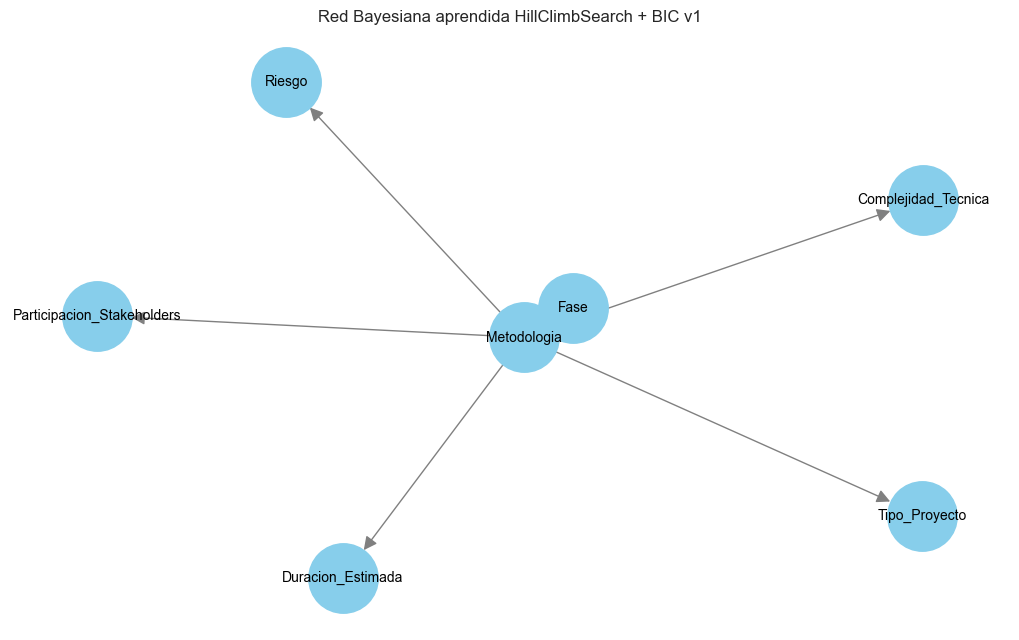


  Finalizado, puedes continuar al siguiente bloque de código.


In [13]:
# =========================================
# PASO 6-C: Visualización comparativa de redes BIC v1
# =========================================

import matplotlib.pyplot as plt
import networkx as nx

def visualizar_red(modelo, titulo="Red Bayesiana"):
    # Crear un grafo dirigido a partir de las aristas de la red bayesiana
    G = nx.DiGraph()
    G.add_edges_from(modelo.edges())

    plt.figure(figsize=(10, 6))
    # Utilizamos un spring_layout con una semilla fija para la reproducibilidad
    pos = nx.spring_layout(G, seed=42)
    # Dibujar el grafo configurando color, tamaño y estilo
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2500,
            edge_color="gray", arrows=True, arrowstyle='-|>', arrowsize=20, font_size=10)
    plt.title(titulo)
    plt.show()

# Visualizar la estructura aprendida en el Modelo BIC v1
visualizar_red(modelo_bic_v1, titulo="Red Bayesiana aprendida HillClimbSearch + BIC v1")

print('\n  Finalizado, puedes continuar al siguiente bloque de código.')

  0%|          | 0/2416 [00:00<?, ?it/s]

-----------------------------------------------
 Precisión en prueba HillClimbSearch + BIC v1: 36.12%
-----------------------------------------------


 Reporte de clasificación (test):
                         precision    recall  f1-score   support

                 Kanban       0.40      0.20      0.26      1904
                   Lean       0.36      0.47      0.41      2091
Metodologia Tradicional       0.34      0.58      0.43      2129
                   SAFe       0.34      0.45      0.39      2030
                  Scrum       0.44      0.15      0.22      1874
                     XP       0.40      0.27      0.33      1972

               accuracy                           0.36     12000
              macro avg       0.38      0.35      0.34     12000
           weighted avg       0.38      0.36      0.34     12000

 Matriz de confusión (datos de prueba):


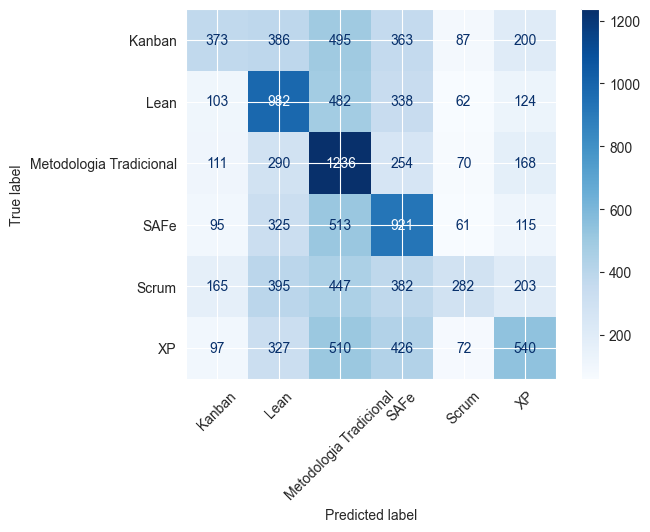


  Finalizado, puedes continuar al siguiente bloque de código.


In [14]:
# =========================================
# PASO 6-D: Evaluación del modelo (test_df)
# =========================================

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Seleccionar el modelo entrenado (en este caso, Modelo BIC v2)
modelo_a_evaluar = modelo_bic_v1  # Puedes cambiarlo por otro modelo si se desea comparar

# Seleccionar solo las variables que el modelo reconoce (los nodos de la red) y descartar la variable 'Metodologia'
X_test = test_df[list(modelo_a_evaluar.nodes())].drop(columns=['Metodologia'])
y_true = test_df['Metodologia']

# Realizar la predicción de la variable objetivo 'Metodologia'
y_pred = modelo_a_evaluar.predict(X_test)['Metodologia']

# Calcular la precisión general (accuracy)
accuracy_bic_v1 = accuracy_score(y_true, y_pred)
print('-----------------------------------------------')
print(f" Precisión en prueba HillClimbSearch + BIC v1: {accuracy_bic_v1 * 100:.2f}%")
print('-----------------------------------------------\n')

# Decodificar las etiquetas para visualización legible
y_true_labels = encoders['Metodologia'].inverse_transform(y_true)
y_pred_labels = encoders['Metodologia'].inverse_transform(y_pred)
labels = encoders['Metodologia'].classes_

# Mostrar el reporte detallado de clasificación (precision, recall, f1-score, etc.)
print("\n Reporte de clasificación (test):")
print(classification_report(y_true_labels, y_pred_labels, target_names=labels, zero_division=0))

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)
print(" Matriz de confusión (datos de prueba):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

print('\n  Finalizado, puedes continuar al siguiente bloque de código.')




---



# HillClimbSearch + k2Score v1

In [15]:
# =========================================
# PASO 7-A: Estructura automática con K2Score v1
# =========================================

from pgmpy.estimators import HillClimbSearch, K2Score
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# Aprender la estructura completa sin filtrar ninguna relación
print(" Aprendiendo estructura de la red bayesiana (con HillClimbSearch + K2Score v1)...")
busqueda = HillClimbSearch(train_df)
estructura_k2 = busqueda.estimate(scoring_method=K2Score(train_df))

# Construir la red bayesiana a partir de la estructura completa aprendida
modelo_k2_v1 = BayesianNetwork(estructura_k2.edges())
modelo_k2_v1.fit(train_df, estimator=BayesianEstimator)

# Validar la red para asegurarse de que es consistente
print(" Red con K2Score válida:", modelo_k2_v1.check_model())

# Mostrar las relaciones aprendidas (todas las aristas que el modelo identificó)
print("\n Relaciones aprendidas (K2Score):")
for u, v in estructura_k2.edges():
    print(f"* {u} → {v}")

print('\n Finalizado, puedes continuar al siguiente bloque de código.')


 Aprendiendo estructura de la red bayesiana (con HillClimbSearch + K2Score v1)...


  0%|          | 0/1000000 [00:00<?, ?it/s]

 Red con K2Score válida: True

 Relaciones aprendidas (K2Score):
* Duracion_Estimada → Metodologia
* Metodologia → Participacion_Stakeholders
* Metodologia → Complejidad_Tecnica
* Metodologia → Riesgo
* Metodologia → Fase
* Metodologia → Tipo_Proyecto

 Finalizado, puedes continuar al siguiente bloque de código.


In [16]:
# =========================================
# PASO 7-B: Estructura automática con K2Score v1
# =========================================

# Ver CPDs del modelo que estés usando
modelo_a_evaluar = modelo_k2_v1  # o el que estés usando
for cpd in modelo_a_evaluar.get_cpds():
    print(f" CPD de la variable: {cpd.variable}")
    print(cpd)
    print("-" * 80)

print('\n  Finalizado, puedes continuar al siguiente bloque de código.')


 CPD de la variable: Duracion_Estimada
+----------------------+----------+
| Duracion_Estimada(0) | 0.336895 |
+----------------------+----------+
| Duracion_Estimada(1) | 0.32925  |
+----------------------+----------+
| Duracion_Estimada(2) | 0.333854 |
+----------------------+----------+
--------------------------------------------------------------------------------
 CPD de la variable: Metodologia
+-------------------+-----+----------------------+
| Duracion_Estimada | ... | Duracion_Estimada(2) |
+-------------------+-----+----------------------+
| Metodologia(0)    | ... | 0.15376109262340545  |
+-------------------+-----+----------------------+
| Metodologia(1)    | ... | 0.16630268996117584  |
+-------------------+-----+----------------------+
| Metodologia(2)    | ... | 0.2103542706600111   |
+-------------------+-----+----------------------+
| Metodologia(3)    | ... | 0.16237174154187467  |
+-------------------+-----+----------------------+
| Metodologia(4)    | ... | 0.1493

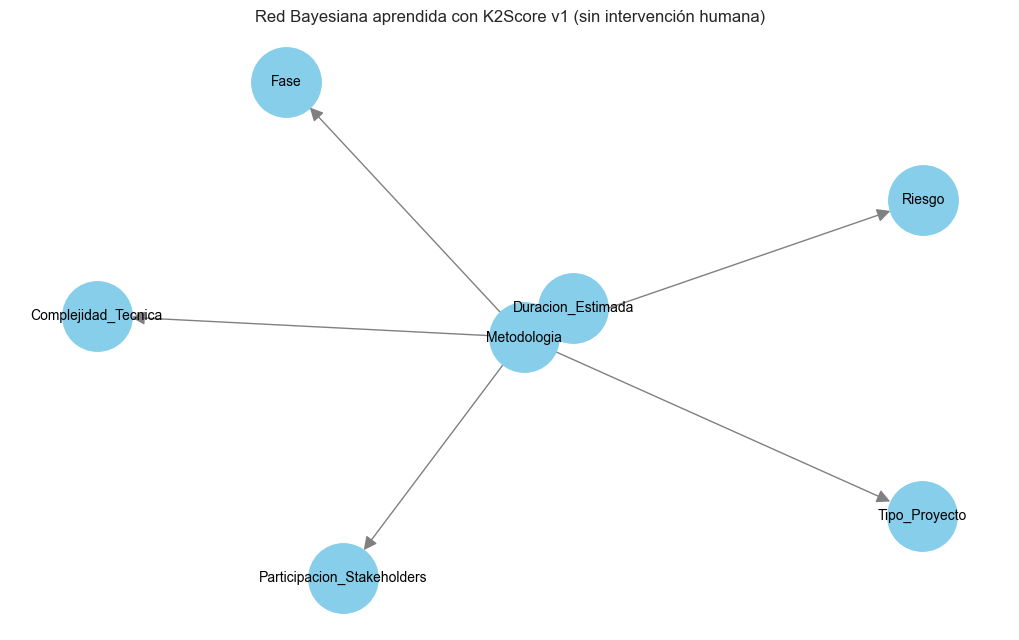


  Finalizado, puedes continuar al siguiente bloque de código.


In [17]:
# =========================================
# PASO 7-C: Visualización comparativa de redes K2Score v1
# =========================================

import matplotlib.pyplot as plt
import networkx as nx

def visualizar_red(modelo, titulo="Red Bayesiana"):
    # Crear un grafo dirigido a partir de las aristas del modelo bayesiano
    G = nx.DiGraph()
    G.add_edges_from(modelo.edges())

    plt.figure(figsize=(10, 6))
    # Ubicar los nodos usando un layout 'spring' para obtener una distribución estética
    pos = nx.spring_layout(G, seed=42)
    # Dibujar el grafo con configuración visual para mejorar la legibilidad
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2500,
            edge_color="gray", arrows=True, arrowstyle='-|>', arrowsize=20, font_size=10)
    plt.title(titulo)
    plt.show()

# Visualizar la estructura aprendida usando el Modelo K2Score v1
# Nota: En este modelo se ha aprendido la red completa sin filtrar solo las causas hacia Metodologia.
visualizar_red(modelo_k2_v1, titulo="Red Bayesiana aprendida con K2Score v1 (sin intervención humana)")

print('\n  Finalizado, puedes continuar al siguiente bloque de código.')


  0%|          | 0/2416 [00:00<?, ?it/s]

---------------------------------------
 Precisión en prueba K2Score v1: 36.12%
--------------------------------------- 


 Reporte de clasificación (test):
                         precision    recall  f1-score   support

                 Kanban       0.40      0.20      0.26      1904
                   Lean       0.36      0.47      0.41      2091
Metodologia Tradicional       0.34      0.58      0.43      2129
                   SAFe       0.34      0.45      0.39      2030
                  Scrum       0.44      0.15      0.22      1874
                     XP       0.40      0.27      0.33      1972

               accuracy                           0.36     12000
              macro avg       0.38      0.35      0.34     12000
           weighted avg       0.38      0.36      0.34     12000

Matriz de confusión (datos de prueba):


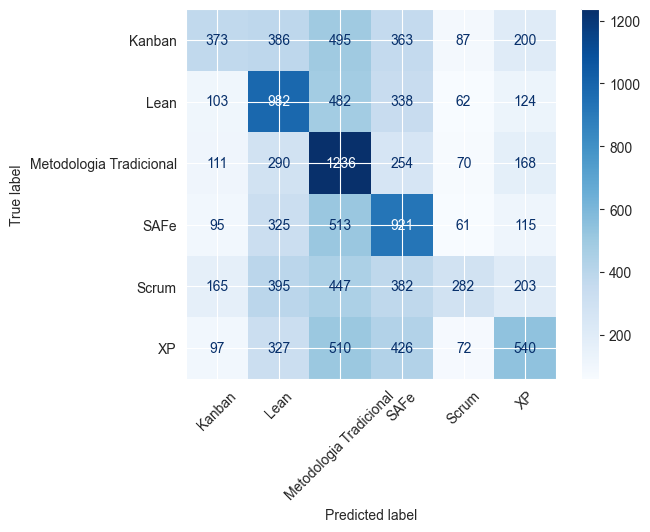


 Finalizado, puedes continuar al siguiente bloque de código.


In [18]:
# =========================================
# PASO 7-D: Evaluación del modelo (test_df)
# =========================================

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Seleccionar el modelo entrenado (en este caso, Modelo K2Score v1)
modelo_a_evaluar = modelo_k2_v1  # Puedes cambiarlo por otro modelo si se desea comparar

# Seleccionar solo las variables que el modelo reconoce y descartar la variable 'Metodologia'
X_test = test_df[list(modelo_a_evaluar.nodes())].drop(columns=['Metodologia'])
y_true = test_df['Metodologia']

# Predicción de la variable objetivo 'Metodologia'
y_pred = modelo_a_evaluar.predict(X_test)['Metodologia']

# Calcular la precisión general (accuracy)
accuracy_k2_v1 = accuracy_score(y_true, y_pred)
print('---------------------------------------')
print(f" Precisión en prueba K2Score v1: {accuracy_k2_v1 * 100:.2f}%")
print('--------------------------------------- \n')

# Decodificar etiquetas para que sean legibles, utilizando los LabelEncoders almacenados en 'encoders'
y_true_labels = encoders['Metodologia'].inverse_transform(y_true)
y_pred_labels = encoders['Metodologia'].inverse_transform(y_pred)
labels = encoders['Metodologia'].classes_

# Mostrar el reporte detallado de clasificación (precision, recall, f1-score, etc.)
print("\n Reporte de clasificación (test):")
print(classification_report(y_true_labels, y_pred_labels, target_names=labels, zero_division=0))

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)
print("Matriz de confusión (datos de prueba):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

print('\n Finalizado, puedes continuar al siguiente bloque de código.')




---



# ALGORITMO PC (Peter–Clark)

In [19]:
# =========================================
# PASO 8-A: Estructura automática con el algoritmo PC
# =========================================

from pgmpy.estimators import PC, BayesianEstimator
from pgmpy.models import BayesianNetwork

print(" Aprendiendo estructura de la red bayesiana (con algoritmo PC)...")
# Estimar la estructura usando el algoritmo PC con los datos de entrenamiento
pc = PC(train_df)
estructura_pc = pc.estimate()

# Construir el modelo bayesiano a partir de la estructura aprendida
modelo_pc = BayesianNetwork(estructura_pc.edges())

# Entrenar el modelo para aprender los CPDs usando BayesianEstimator
modelo_pc.fit(train_df, estimator=BayesianEstimator)

# Validar el modelo aprendido
print("Red aprendida con PC válida:", modelo_pc.check_model())

# Mostrar las relaciones aprendidas en la red
print("\n Relaciones aprendidas (PC):")
for u, v in estructura_pc.edges():
    print(f"* {u} → {v}")

print('\n Finalizado, puedes continuar al siguiente bloque de código.')


 Aprendiendo estructura de la red bayesiana (con algoritmo PC)...


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\User\Desktop\TFM_Leandro_Leonardo_Dominican_Republic\.venv\lib\site-packages\pgmpy\estimators\CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
C:\Users\User\Desktop\TFM_Leandro_Leonardo_Dominican_Republic\.venv\lib\site-packages\pgmpy\estimators\CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
C:\Users\User\Desktop\TFM_Leandro_Leonardo_Dominican_Republic\.venv\lib\site-packages\pgmpy\estimators\CITests.py:548: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equa

Red aprendida con PC válida: True

 Relaciones aprendidas (PC):
* Riesgo → Metodologia
* Complejidad_Tecnica → Metodologia
* Tipo_Proyecto → Metodologia
* Participacion_Stakeholders → Metodologia
* Fase → Metodologia
* Duracion_Estimada → Metodologia

 Finalizado, puedes continuar al siguiente bloque de código.


In [20]:
# =========================================
# PASO 8-B: Visualización de CPDs del modelo aprendido con PC
# =========================================

print("\n Mostrando las CPDs (probabilidades condicionales) del modelo bayesiano (PC):")
for cpd in modelo_pc.get_cpds():
    print(f" CPD de la variable: {cpd.variable}")
    print(cpd)
    print("-" * 80)

print('\n Finalizado, puedes continuar al siguiente bloque de código.')



 Mostrando las CPDs (probabilidades condicionales) del modelo bayesiano (PC):
 CPD de la variable: Riesgo
+-----------+----------+
| Riesgo(0) | 0.3345   |
+-----------+----------+
| Riesgo(1) | 0.330729 |
+-----------+----------+
| Riesgo(2) | 0.334771 |
+-----------+----------+
--------------------------------------------------------------------------------
 CPD de la variable: Metodologia
+----------------------------+-----+-------------------------------+
| Complejidad_Tecnica        | ... | Complejidad_Tecnica(2)        |
+----------------------------+-----+-------------------------------+
| Duracion_Estimada          | ... | Duracion_Estimada(2)          |
+----------------------------+-----+-------------------------------+
| Fase                       | ... | Fase(4)                       |
+----------------------------+-----+-------------------------------+
| Participacion_Stakeholders | ... | Participacion_Stakeholders(2) |
+----------------------------+-----+----------------

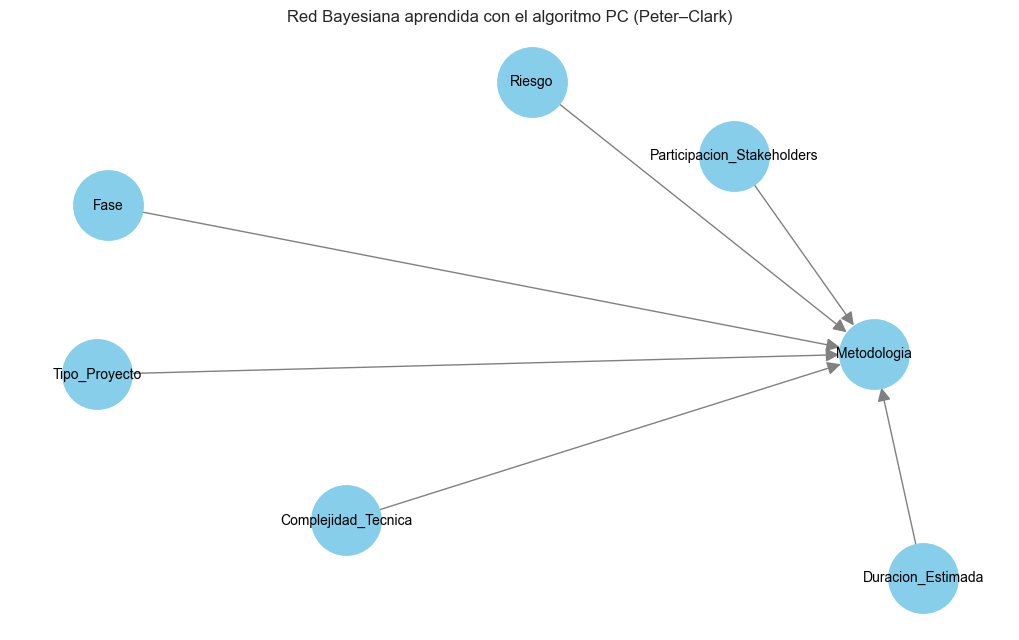


  Finalizado, puedes continuar al siguiente bloque de código.


In [21]:
# =========================================
# PASO 8-C: Visualización comparativa de redes PC (Peter–Clark)
# =========================================

import matplotlib.pyplot as plt
import networkx as nx

def visualizar_red(modelo, titulo="Red Bayesiana"):
    # Crear un grafo dirigido a partir de las aristas del modelo bayesiano
    G = nx.DiGraph()
    G.add_edges_from(modelo.edges())

    plt.figure(figsize=(10, 6))
    # Ubicar los nodos utilizando un spring_layout para una distribución estética de los nodos
    pos = nx.spring_layout(G, seed=42)
    # Dibujar el grafo con estilos para mejorar la legibilidad
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2500,
            edge_color="gray", arrows=True, arrowstyle='-|>', arrowsize=20, font_size=10)
    plt.title(titulo)
    plt.show()

# Visualizar la estructura aprendida usando el Modelo PC (aprendido con el algoritmo PC)
visualizar_red(modelo_pc, titulo="Red Bayesiana aprendida con el algoritmo PC (Peter–Clark)")

print('\n  Finalizado, puedes continuar al siguiente bloque de código.')


  0%|          | 0/2416 [00:00<?, ?it/s]

---------------------------------------
 Precisión en prueba del modelo PC: 33.25%
--------------------------------------- 


 Reporte de clasificación del modelo PC (test):
                         precision    recall  f1-score   support

                 Kanban       0.29      0.27      0.28      1904
                   Lean       0.34      0.44      0.38      2091
Metodologia Tradicional       0.34      0.43      0.38      2129
                   SAFe       0.34      0.35      0.35      2030
                  Scrum       0.33      0.18      0.24      1874
                     XP       0.34      0.29      0.31      1972

               accuracy                           0.33     12000
              macro avg       0.33      0.33      0.32     12000
           weighted avg       0.33      0.33      0.33     12000

 Matriz de confusión (datos de prueba) para el modelo PC:


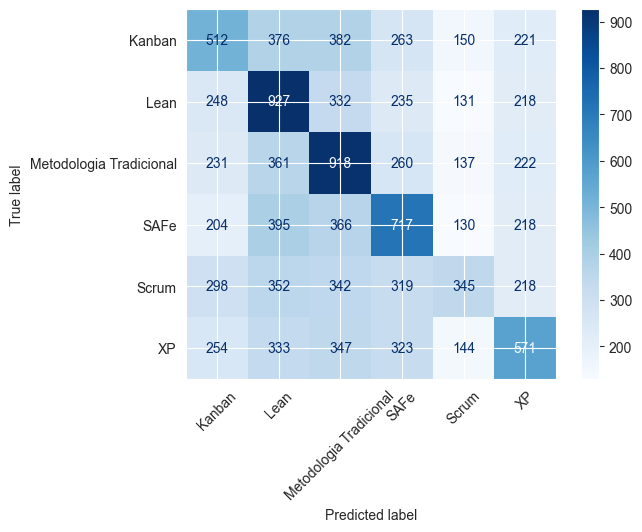


 Finalizado, puedes continuar al siguiente bloque de código.


In [22]:
# =========================================
#  PASO 8-D: Evaluación del modelo PC (test_df) – Precisión y reportes
# =========================================

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Preparar los datos de prueba usando solo las variables que forman parte de la red (nodos)
X_test_pc = test_df[list(modelo_pc.nodes())].drop(columns=['Metodologia'])
y_true_pc = test_df['Metodologia']

# Realizar la predicción de 'Metodologia' con el modelo bayesiano aprendido mediante el algoritmo PC
# La función predict devuelve un diccionario; extraemos la columna correspondiente a 'Metodologia'
y_pred_pc = modelo_pc.predict(X_test_pc)['Metodologia']

# Calcular el porcentaje de precisión (accuracy)
accuracy_pc = accuracy_score(y_true_pc, y_pred_pc)
print('---------------------------------------')
print(f" Precisión en prueba del modelo PC: {accuracy_pc * 100:.2f}%")
print('--------------------------------------- \n')

# Decodificar las etiquetas para visualización legible (usando el LabelEncoder almacenado en 'encoders')
y_true_labels_pc = encoders['Metodologia'].inverse_transform(y_true_pc)
y_pred_labels_pc = encoders['Metodologia'].inverse_transform(y_pred_pc)
labels_pc = encoders['Metodologia'].classes_

# Mostrar el reporte de clasificación (precision, recall, f1-score, etc.)
print("\n Reporte de clasificación del modelo PC (test):")
print(classification_report(y_true_labels_pc, y_pred_labels_pc, target_names=labels_pc, zero_division=0))

# Calcular y mostrar la matriz de confusión (datos de prueba)
cm_pc = confusion_matrix(y_true_labels_pc, y_pred_labels_pc, labels=labels_pc)
print(" Matriz de confusión (datos de prueba) para el modelo PC:")
disp_pc = ConfusionMatrixDisplay(confusion_matrix=cm_pc, display_labels=labels_pc)
disp_pc.plot(cmap='Blues', xticks_rotation=45)
plt.show()

print('\n Finalizado, puedes continuar al siguiente bloque de código.')




---



In [23]:
# =========================================
#  PASO 9: Tabla comparativa de precisión de los modelos (condicional)
# =========================================

import pandas as pd

# Inicializar una lista para almacenar los resultados
resultados = []

# Se intenta agregar cada modelo solo si la variable de precisión ya existe en el entorno.
if 'accuracy_bic_v1' in globals():
    resultados.append({"Modelo": "Modelo BIC", "Precisión (%)": accuracy_bic_v1 * 100})
if 'accuracy_k2_v1' in globals():
    resultados.append({"Modelo": "Modelo K2Score", "Precisión (%)": accuracy_k2_v1 * 100})
if 'accuracy_pc' in globals():
    resultados.append({"Modelo": "Modelo PC", "Precisión (%)": accuracy_pc * 100})

# Si se han agregado resultados, se muestra la tabla; de lo contrario, se informa que no hay modelos definidos.
if resultados:
    tabla_resultados = pd.DataFrame(resultados)
    print("<< APRENDIZAJE NO SUPERVISADO (modelo autonomo sin intervencion humana): >> \nTabla comparativa de precisión de los modelos:")
    display(tabla_resultados)
else:
    print(" No se han definido precisiones para ningún modelo.")

print('\n Finalizado, puedes continuar al siguiente bloque de código.')


<< APRENDIZAJE NO SUPERVISADO (modelo autonomo sin intervencion humana): >> 
Tabla comparativa de precisión de los modelos:


,Modelo,Precisión (%)
0,Modelo BIC,36.116667
1,Modelo K2Score,36.116667
2,Modelo PC,33.250000



 Finalizado, puedes continuar al siguiente bloque de código.


In [24]:
# =========================================
# BLOQUE FINAL: Informe de tiempo y uso de recursos
# =========================================

import time, os
import psutil
import shutil

# Tiempo transcurrido
elapsed = time.time() - _start_time
mins, secs = divmod(elapsed, 60)
print(f"\n=== INFORME DE EJECUCIÓN ===")
print(f"- Tiempo total: {int(mins)} min {int(secs)} s")

# Memoria usada por este proceso
proc = psutil.Process(os.getpid())
rss_gb = proc.memory_info().rss / 1024**3
print(f"- RAM usada (resident set): {rss_gb:.2f} GB")

# Espacio en disco tras la ejecución
du2 = shutil.disk_usage(os.getcwd())
free_disk2 = du2.free / 1024**3
print(f"- Espacio libre en disco (post-run): {free_disk2:.1f} GB")

# GPU (si aplica)
try:
    import torch
    if torch.cuda.is_available():
        alloc = torch.cuda.memory_allocated(0) / 1024**3
        resv  = torch.cuda.memory_reserved(0)  / 1024**3
        print(f"- GPU memoria usada: {alloc:.2f} GB, reservada: {resv:.2f} GB")
except ImportError:
    pass

print("=============================")



=== INFORME DE EJECUCIÓN ===
- Tiempo total: 0 min 20 s
- RAM usada (resident set): 0.39 GB
- Espacio libre en disco (post-run): 852.2 GB




---



# Limpia todo los recursos utilizados

In [25]:
# =========================================
# BLOQUE OPCIONAL DE AUTO-CLEANUP
# =========================================

# ─── CONFIGURACIÓN ───────────────────────
# Pon AUTO_CLEANUP = True para limpiar al ejecutar este bloque.
# Si lo dejas False o no ejecutas este bloque, no borrará nada.
AUTO_CLEANUP = True

# ─── LISTAS DE TEMPORALES ────────────────
# Rellena estas listas con las rutas/variables que quieras limpiar.
temp_files = [
    ruta_csv
    #"/content/dataset_proyectos_balanceado.csv",
    # "/ruta/a/otro_temporal.csv",
    # "/ruta/a/temporal.npz",
]

temp_vars = [
    "df", "df_codificado",
    "train_df", "test_df",
    "disc_train", "disc_test",
    "bn_auto", "model_bn", "rf", "infer",
    # Añade aquí NOMBRE EXACTO de cualquier variable grande
]

# ─── EJECUCIÓN ───────────────────────────
if AUTO_CLEANUP:
    import os, gc

    print("\n===== AUTO-CLEANUP INICIADO =====")

    # 1) Elimina archivos de disco
    for ruta in temp_files:
        if os.path.exists(ruta):
            try:
                os.remove(ruta)
                print(f" Archivo borrado: {ruta}")
            except Exception as e:
                print(f"️ Error borrando {ruta}: {e}")
        else:
            print(f"  No existe: {ruta}")

    # 2) Elimina variables del entorno
    for var in temp_vars:
        if var in globals():
            try:
                del globals()[var]
                print(f" Variable borrada: {var}")
            except Exception as e:
                print(f"  Error borrando variable {var}: {e}")
        else:
            print(f" Variable no encontrada: {var}")

    # 3) Forzar recolección de basura
    recolectados = gc.collect()
    print(f" Objetos liberados por GC: {recolectados}")

    print("===== AUTO-CLEANUP COMPLETADO =====\n")
else:
    print("️  AUTO_CLEANUP está en False: no se borró nada.")



===== AUTO-CLEANUP INICIADO =====
 Archivo borrado: C:/Users/User/Downloads/sevilla_Leandro_Leonardo/content/dataset_proyectos_balanceado.csv
 Variable borrada: df
 Variable borrada: df_codificado
 Variable borrada: train_df
 Variable borrada: test_df
 Variable no encontrada: disc_train
 Variable no encontrada: disc_test
 Variable no encontrada: bn_auto
 Variable no encontrada: model_bn
 Variable no encontrada: rf
 Variable no encontrada: infer
 Objetos liberados por GC: 16304
===== AUTO-CLEANUP COMPLETADO =====

